In [1]:
# importing useful libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Ṛeading the Dataset
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Fetching information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# To check whether there are any null values in dataset
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# To check if there are duplicate records in the dataset
df.duplicated().sum()

1081

In [6]:
# To drop duplicates
df= df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
# To check the count of each value
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [9]:
# To convert Class 0 and Class 1 into dataframes valid=0 and fraud=1
valid=df[df.Class==0]
fraud=df[df.Class==1]

In [10]:
# Check shape of valid and fraud dataframes
valid.shape

(283253, 31)

In [11]:
fraud.shape

(473, 31)

In [12]:
valid.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [13]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
# To balance the recods of valid and fraud entries
valid_sample =valid.sample(n=473)
valid_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258406,158641.0,1.961897,0.005224,-1.893481,0.207936,1.102956,0.684155,-0.054263,0.198091,0.499058,...,-0.297465,-0.644858,0.397669,-0.656650,-0.444533,0.276965,-0.013210,-0.043262,1.98,0
64647,51244.0,-1.586437,0.045956,0.150331,-0.906954,-1.816002,1.956180,-4.106670,-8.031262,-0.678187,...,-3.688376,1.641628,-2.999751,-0.189614,0.303799,-0.086695,0.528204,0.234234,500.91,0
54477,46468.0,1.152088,0.012450,1.297450,1.337305,-0.926489,-0.185143,-0.517131,0.055628,0.797341,...,-0.054867,0.077322,-0.012167,0.413072,0.435738,-0.411415,0.076420,0.039787,9.99,0
108386,70874.0,-0.363048,1.028658,1.166844,-0.124446,0.199731,-0.488192,0.559162,0.127744,-0.545302,...,-0.240218,-0.684096,-0.061544,-0.063632,-0.166345,0.076695,0.237722,0.083594,2.69,0
82850,59582.0,1.186572,-0.054312,0.803843,1.244636,-0.625404,-0.036633,-0.422532,0.065210,0.860211,...,0.059791,0.379929,-0.207110,-0.091797,0.704609,-0.184513,0.055800,0.026014,18.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15787,27225.0,1.102936,0.184741,0.570149,1.347672,-0.499376,-0.726352,0.049935,-0.061594,0.054135,...,0.140178,0.393012,-0.028109,0.591485,0.495414,-0.284039,0.025861,0.026888,29.99,0
151037,94422.0,1.266756,-1.888169,-3.225643,0.003933,0.306750,-0.964422,1.323886,-0.957572,-0.106298,...,0.029829,-0.188251,-0.712916,-0.918636,0.470248,0.979226,-0.243748,-0.009373,561.05,0
55956,47205.0,1.204223,-0.923207,-0.732238,-0.521430,1.209831,3.882787,-1.213615,0.939461,-0.591552,...,-0.249316,-0.396303,-0.155713,0.988250,0.658427,-0.215393,0.066335,0.040815,85.00,0
103538,68702.0,-3.371320,-3.510362,2.212638,3.769158,1.716459,-0.295936,-1.229084,0.674760,-0.798051,...,0.649475,0.251419,1.133378,-0.418050,0.398133,0.409945,-0.138983,0.170859,384.04,0


In [15]:
# Concate the new dataframe of valid samples and fraud to convert it into a balanced datasets
new_df=pd.concat([valid_sample,fraud],axis=0)
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
258406,158641.0,1.961897,0.005224,-1.893481,0.207936,1.102956,0.684155,-0.054263,0.198091,0.499058,...,-0.297465,-0.644858,0.397669,-0.656650,-0.444533,0.276965,-0.013210,-0.043262,1.98,0
64647,51244.0,-1.586437,0.045956,0.150331,-0.906954,-1.816002,1.956180,-4.106670,-8.031262,-0.678187,...,-3.688376,1.641628,-2.999751,-0.189614,0.303799,-0.086695,0.528204,0.234234,500.91,0
54477,46468.0,1.152088,0.012450,1.297450,1.337305,-0.926489,-0.185143,-0.517131,0.055628,0.797341,...,-0.054867,0.077322,-0.012167,0.413072,0.435738,-0.411415,0.076420,0.039787,9.99,0
108386,70874.0,-0.363048,1.028658,1.166844,-0.124446,0.199731,-0.488192,0.559162,0.127744,-0.545302,...,-0.240218,-0.684096,-0.061544,-0.063632,-0.166345,0.076695,0.237722,0.083594,2.69,0
82850,59582.0,1.186572,-0.054312,0.803843,1.244636,-0.625404,-0.036633,-0.422532,0.065210,0.860211,...,0.059791,0.379929,-0.207110,-0.091797,0.704609,-0.184513,0.055800,0.026014,18.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


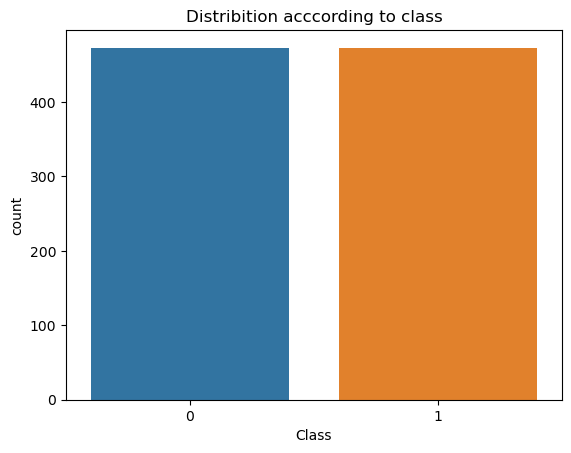

In [16]:
# To check whether new dataset is balanced or not
sns.countplot(x='Class',data=new_df)
plt.title("Distribition acccording to class")
plt.show()


In [17]:
# Ṣplitting the dataset
x=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

In [18]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
258406,158641.0,1.961897,0.005224,-1.893481,0.207936,1.102956,0.684155,-0.054263,0.198091,0.499058,...,-0.242958,-0.297465,-0.644858,0.397669,-0.656650,-0.444533,0.276965,-0.013210,-0.043262,1.98
64647,51244.0,-1.586437,0.045956,0.150331,-0.906954,-1.816002,1.956180,-4.106670,-8.031262,-0.678187,...,1.621245,-3.688376,1.641628,-2.999751,-0.189614,0.303799,-0.086695,0.528204,0.234234,500.91
54477,46468.0,1.152088,0.012450,1.297450,1.337305,-0.926489,-0.185143,-0.517131,0.055628,0.797341,...,-0.092909,-0.054867,0.077322,-0.012167,0.413072,0.435738,-0.411415,0.076420,0.039787,9.99
108386,70874.0,-0.363048,1.028658,1.166844,-0.124446,0.199731,-0.488192,0.559162,0.127744,-0.545302,...,0.098636,-0.240218,-0.684096,-0.061544,-0.063632,-0.166345,0.076695,0.237722,0.083594,2.69
82850,59582.0,1.186572,-0.054312,0.803843,1.244636,-0.625404,-0.036633,-0.422532,0.065210,0.860211,...,-0.122488,0.059791,0.379929,-0.207110,-0.091797,0.704609,-0.184513,0.055800,0.026014,18.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [20]:
# Training and evaluating the LogisticRegression model
LR = LogisticRegression()

In [21]:
LR.fit(x_train,y_train)

LogisticRegression()

In [22]:
predicted_train=LR.predict(x_train)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_train, predicted_train)*100, "%")

The accuracy of Logistic Regression is :  94.5619335347432 %


In [23]:
predicted=LR.predict(x_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Logistic Regression is :  92.6056338028169 %


In [24]:
# Training and evaluating the Random Forest model
Ranforest = RandomForestClassifier(n_estimators = 10, random_state = 0)  
Ranforest.fit(x_train, y_train)  

RandomForestClassifier(n_estimators=10, random_state=0)

In [25]:
predicted=Ranforest.predict(x_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Random Forest is :  92.6056338028169 %


In [26]:
# Training and evaluating the Decision Tree model
DecTree = DecisionTreeClassifier(max_depth=5)

DecTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [27]:
predicted=DecTree.predict(x_test)
print ("The accuracy of Decision Tree is : ", accuracy_score(y_test, predicted)*100, "%")

The accuracy of Decision Tree is :  90.49295774647888 %


# Hence from above evaluations we can say that the Random forest model perfoms the best with accuracu score of 94.01%